In [4]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))
from Code.logistic_regression import logistic_loss_func, logistic_grad, import_breast_cancer, accuracy_func
from Code.utilities import train_test_split, plot_test_results
from Code.descent_methods import SGD_adam

import jax.numpy as jnp
import numpy as np
from jax import nn

In [5]:
X, y = import_breast_cancer()

c:\Users\Trond\OneDrive\7. semester\FYS-STK3155 - Anvendt dataanalyse og maskinlæring\Projects\Project2_FYS_STK4155\Code\logistic_regression.py:42: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  X = jnp.array(data.to_numpy()[:, 1:-1], dtype=jnp.float64)


In [6]:
X_train, y_train, X_test, y_test, test_index = train_test_split(X, y, 0.2)
m = int(len(y_train) / 10)
epochs = 50

beta0 = {"W1":np.random.random((X_train.shape[1], 20)), "W2":np.random.random((20, 20)), "W3":np.random.random((20, 1)), "b2":np.random.random(), "b3":np.random.random()}

print(X)
def classifier_model(beta, X):
    out = X.copy()
    out = nn.sigmoid(jnp.dot(out, beta["W1"]))
    out = nn.sigmoid(jnp.add(jnp.dot(out, beta["W2"]), beta["b2"]))
    out = nn.sigmoid(jnp.add(jnp.dot(out, beta["W3"]), beta["b3"]))
    return out
    
classifier_model(beta0, X)
loss_func = logistic_loss_func(classifier_model)
log_loss_grad = logistic_grad(classifier_model)
accuracy_test_func = accuracy_func(classifier_model)


[[ 5.  1.  1. ...  3.  1.  1.]
 [ 5.  4.  4. ...  3.  2.  1.]
 [ 3.  1.  1. ...  3.  1.  1.]
 ...
 [ 5. 10. 10. ...  8. 10.  2.]
 [ 4.  8.  6. ... 10.  6.  1.]
 [ 4.  8.  8. ... 10.  4.  1.]]


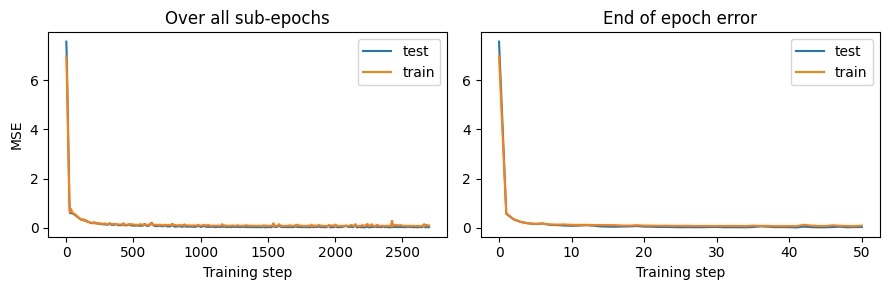

In [7]:
result_adam = SGD_adam(X_train, y_train, X_test, y_test, grad_method=log_loss_grad,n_epochs=epochs, beta0=beta0, test_loss_func=loss_func)
plot_test_results(result_adam["test_loss_list"], result_adam["train_loss_list"], m)

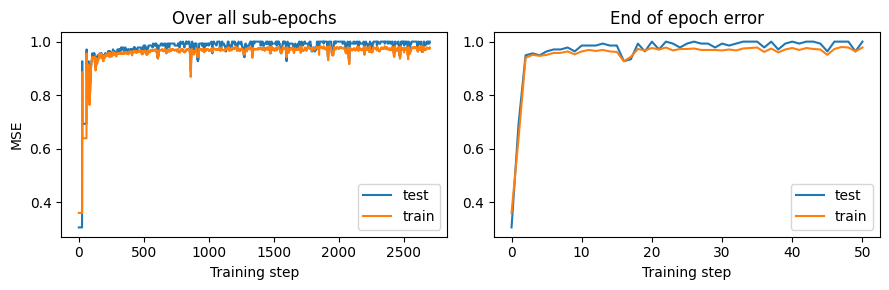

In [8]:
result_adam = SGD_adam(X_train, y_train, X_test, y_test, grad_method=log_loss_grad,n_epochs=epochs, beta0=beta0, test_loss_func=accuracy_test_func)
plot_test_results(result_adam["test_loss_list"], result_adam["train_loss_list"], m)